### Interactive Playbook for iderare_pheno library

#### Part 1 - Standardizing the terminology

Converter for the iderare_pheno library. This library is used to generate phenotypes for the iderare dataset. This notebook is an interactive playbook that demonstrates how to use the library.

In [1]:
from iderare_pheno.converter import term2omim, term2orpha, term2hpo, batchconvert

In [2]:
# Example of parsing SNOMEDCT to ORPHA code(s) (term2orpha), it will return a list of ORPHA code(s)
snomed_code = 'SNOMEDCT:190794006'
term2orpha_res = term2orpha(snomed_code)
print('Orpha List for {}'.format(snomed_code), term2orpha_res)

Trying to parse ORPHA from SNOMEDCT SNOMEDCT:190794006
Parsing of SNOMEDCT:190794006 successful with result of : 1  ORPHA code :  ORPHA:355 

Orpha List for SNOMEDCT:190794006 ['ORPHA:355']


In [3]:
# Example of converting LOINC / SNOMEDCT to HPO (term2hpo), it will return a list of HPO code(s)
loinc_code = 'LOINC:1751-7|L'
snomed_code = 'SNOMEDCT:75183008'

term2hpo_res = term2hpo(loinc_code) + term2hpo(snomed_code)
print('HPO List result after converting LOINC and SNOMEDCT to HPO are', term2hpo_res)

Trying to parse HPO from terminology LOINC:1751-7|L
Parsing of LOINC:1751-7|L successful with result of : ['HP:0003073'] 

Trying to parse HPO from terminology SNOMEDCT:75183008
Parsing of SNOMEDCT:75183008 successful with result of : 2  HPO code :  HP:0001410, HP:0002910 

HPO List result after converting LOINC and SNOMEDCT to HPO are ['HP:0003073', 'HP:0001410', 'HP:0002910']


In [4]:
# Example of converting ICD10 and ORPHA to OMIM (term2omim), it will return a list of OMIM code(s)
icd10_code = 'ICD-10:E74.0'
orpha_code = 'ORPHA:355'

term2omim_res = term2omim(icd10_code) + term2omim(orpha_code)
print('OMIM List result after converting ICD10 and ORPHA to OMIM are', term2omim_res)

Trying to parse OMIM from terminology ICD-10:E74.0
Parsing of ICD-10:E74.0 successful with result of : 27  OMIM code :  OMIM:232200, OMIM:232500, OMIM:261670, OMIM:612933, OMIM:232800, OMIM:306000, OMIM:613027, OMIM:263570, OMIM:227810, OMIM:240600, OMIM:232300, OMIM:232400, OMIM:232600, OMIM:232240, OMIM:232220, OMIM:616199, OMIM:611556, OMIM:613507, OMIM:300559, OMIM:300653, OMIM:300257, OMIM:614128, OMIM:615895, OMIM:232700, OMIM:612932, OMIM:611881, OMIM:261750 

Trying to parse OMIM from terminology ORPHA:355
Parsing of ORPHA:355 successful with result of : 6  OMIM code :  OMIM:608013, OMIM:610539, OMIM:230900, OMIM:230800, OMIM:231000, OMIM:231005 

OMIM List result after converting ICD10 and ORPHA to OMIM are ['OMIM:232200', 'OMIM:232500', 'OMIM:261670', 'OMIM:612933', 'OMIM:232800', 'OMIM:306000', 'OMIM:613027', 'OMIM:263570', 'OMIM:227810', 'OMIM:240600', 'OMIM:232300', 'OMIM:232400', 'OMIM:232600', 'OMIM:232240', 'OMIM:232220', 'OMIM:616199', 'OMIM:611556', 'OMIM:613507', 'OM

In [5]:
# Example of automated parsing of mixed codes of SNOMEDCT, LOINC, ICD10, OMIM, HPO, ORPHA to OMIM and HPO (batchconvert)
clinical_data_list = ['SNOMEDCT:258211005', 'SNOMEDCT:36760000', 'SNOMEDCT:271737000', 'SNOMEDCT:389026000', 'SNOMEDCT:70730006', 'SNOMEDCT:127035006', 'SNOMEDCT:33688009', 'SNOMEDCT:75183008', 'SNOMEDCT:59927004', 'SNOMEDCT:312894000', 'SNOMEDCT:48724000', 'SNOMEDCT:1388004', 'LOINC:1751-7|L', 'LOINC:2085-9|L', 'LOINC:777-3|L', 'LOINC:2519-7|H', 'LOINC:1742-6|H', 'LOINC:1920-8|H', 'HP:0002366', 'HP:0006568', 'HP:0004333', 'HP:0001531', 'SNOMEDCT:65959000', 'SNOMEDCT:190794006', 'SNOMEDCT:66751000', 'ICD-10:E74.0']

# Batch convert will return 2 list array
hpo_sets, diagnosis_sets = batchconvert(clinical_data_list)

print('HPO List result after converting mixed codes to HPO are', hpo_sets)
print('OMIM List result after converting mixed codes to OMIM are', diagnosis_sets)

Processing clinical data :  SNOMEDCT:258211005
Trying to parse HPO from terminology SNOMEDCT:258211005
Parsing of SNOMEDCT:258211005 successful with result of : 1  HPO code :  HP:0000007 

SNOMEDCT is recognized as clinical finding, parsing to HPO and add to list
Processing clinical data :  SNOMEDCT:36760000
Trying to parse HPO from terminology SNOMEDCT:36760000
Parsing of SNOMEDCT:36760000 successful with result of : 1  HPO code :  HP:0001433 

SNOMEDCT is recognized as clinical finding, parsing to HPO and add to list
Processing clinical data :  SNOMEDCT:271737000
Trying to parse HPO from terminology SNOMEDCT:271737000
Parsing of SNOMEDCT:271737000 successful with result of : 1  HPO code :  HP:0001903 

SNOMEDCT is recognized as clinical finding, parsing to HPO and add to list
Processing clinical data :  SNOMEDCT:389026000
Trying to parse HPO from terminology SNOMEDCT:389026000
Parsing of SNOMEDCT:389026000 successful with result of : 1  HPO code :  HP:0001541 

SNOMEDCT is recognized

#### Part 2 - Similarity and ontology linkage analysis between the phenotype and given differential diagnoses

This part will cover how to use the similarity and ontology linkage analysis between phenotype and differential diagnoses.


Given the ```diagnosis_sets```, and ```hpo_sets``` as input, the similarity and ontology linkage analysis will be performed. The similarity and ontology linkage analysis will be performed using the ```iderare_pheno.simrec``` (similarity & recommendation) library. 

In this part, it will resulted in ```full``` diagnosis_sets linkage and similarity analysis, and ```filtered``` diagnosis_sets linkage and similarity analysis. The ```filtered``` diagnosis_sets linkage and similarity analysis will only show the diagnosis_sets that have similarity score **greater than preset threshold** or **n-top diagnoses** if there are no disease passing the minimum threshold.

The similarity score is calculated using ```graph``` method with ```bma``` (best-match average) strategy.

In [6]:
from iderare_pheno.simrec import hpo2omim_similarity

In [7]:
## For similarity first of all, set up the threshold and n-top differential diagnoses, you would like to analyzed
thr = 0.5 # Filter option 1 : example of threshold of 0.5 similarity
diffx = 10 # Filter option 2 / fallback if there are none passing threshold : example of top-100 differential diagnoses

In [8]:
## hpo2omim_similarity will return 3 object :
# 1. first (list) will be similarity score 
# 2. second (array) will contain the linkage, disease name, and omim disease ID of all differential diagnoses, sorted desc by similarity score
# 3. third (array) will contain the linkage, disease name, and omim disease ID of filtered diagnoses, sorted desc by similarity score

s_sim, [lnk_all, sr_dis_name, sr_dis_id], [lnk_thr, sr_dis_name_thr, sr_dis_id_thr] = hpo2omim_similarity(diagnosis_sets, hpo_sets, threshold=thr, differential=diffx)

# Print the result of all disease name ranked
for i in range(len(sr_dis_name_thr)):
    print('Rank', str(i+1), ':', sr_dis_name_thr[i], 'Sim:', s_sim[i])

Trying to get similarity check between OMIM and HPOSet
Convert the OMIM code to HPO set object
Splitting process done
Get the similarity score between Patient's phenotype compared to OMIM Object using 'graphic' method and 'bma' combine method.
Similarity analysis done.

Object names sorted by the highest similarities:
['Fanconi-Bickel syndrome', 'Glycogen storage disease XII', 'Thalassemia-beta, dominant inclusion-body', 'Glycogen storage disease IV', 'Glycogen storage disease IXc', 'Glycogen storage disease VI', 'Gaucher disease, type I', 'Polyglucosan body myopathy 1 with or without immunodeficiency', 'Gaucher disease, atypical', 'Niemann-pick disease, type C1', 'Gaucher disease, type III', 'Glycogen storage disease Ia', 'Gaucher disease, type II', 'Gaucher disease, perinatal lethal', 'Glycogen storage disease type IXb', 'Glycogen storage disease Ib', 'Niemann-pick disease, type C2', 'Glycogen storage disease VII', 'Gaucher disease, type IIIC', 'Glycogen storage disease Ic', 'Glycoge

#### Part 3 - Getting the recommendation of diagnoses based on the similarity and ontology linkage analysis between the phenotype provided and OMIM databases

This part will cover how to use the gene and phenotype differential diagnoses set generator to generate the OMIM-based differential diagnoses set based on the phenotype provided.

The differential diagnoses set is generated based on the similarity and ontology linkage analysis between the phenotype provided and OMIM databases. The function will return the differential diagnoses set based on the phenotype provided **filtered by** threshold, and if there are no diagnoses fulfilling the threshold, it will use the top-n recommendation.


In [9]:
from iderare_pheno.simrec import omim_recommendation

In [10]:
## For similarity first of all, set up the threshold and n-top differential diagnoses, you would like to analyzed
rec_thr = 0.4 # Filter option 1 : example of threshold of 0.5 similarity
recx = 25 # Filter option 2 / fallback if there are none passing threshold : example of top-25 recommendation by similarity

In [11]:
## like hpo2omim_similarity will return 3 object :
# 1. first (list) will be similarity score 
# 2. second (array) will contain the disease name, and omim disease ID of all differential diagnoses, sorted desc by similarity score (note : linkage for all disease will not be done, due to computational restriction)
# 3. third (array) will contain the linkage, disease name, and omim disease ID of filtered diagnoses, sorted desc by similarity score

# Give recommendation of causative gene
rg_s_sim, [_, rg_sr_dis_name, rg_sr_dis_id], [rg_lnk_thr, rg_sr_dis_name_thr, rg_sr_dis_id_thr] = omim_recommendation(hpo_sets, type='gene', threshold=rec_thr, recommendation=recx)

# Print the result with similarity > threshold
print('Recommendation of high potential gene : ')
for i in range(len(rg_sr_dis_name_thr)):
    print('Rank', str(i+1), ':', rg_sr_dis_name_thr[i], 'Sim:', rg_s_sim[i])

Trying to get similarity check between OMIM and HPOSet
Get the similarity check between 5026 Gene and HPOSet
Splitting process done
Get the similarity score between Patient's phenotype compared to OMIM Object using 'graphic' method and 'bma' combine method.
Similarity analysis done.

Object names sorted by the highest similarities:
['HSD3B7', 'LIPA', 'AKR1D1', 'PYGL', 'BAAT', 'CDAN1', 'CALR', 'MRPL3', 'TRMT10C', 'FAH', 'LARS1', 'RUNX1', 'STEAP3', 'SLC2A2', 'MYO5B', 'KIF23', 'SLC4A1', 'PKLR', 'RHAG', 'PHKG2', 'VPS45', 'SP110', 'RPS14', 'GALM', 'SCO1', 'KLF1', 'TKFC', 'LARS2', 'MST1', 'SEMA4D', 'GPR35', 'MRPS7', 'TFAM', 'UNC13D', 'KCNN4', 'FERMT3', 'ABCD3', 'UQCRB', 'HBB', 'RHCE', 'ACAD9', 'MPI', 'PCCB', 'PCCA', 'STXBP2', 'SMPD1', 'MMAB', 'LCAT', 'STX11', 'SLC25A13', 'RACGAP1', 'FADD', 'UQCRFS1', 'HAMP', 'DCDC2', 'SCARB2', 'DEF6', 'EPB42', 'F5', 'STX5', 'ATP8B1', 'FECH', 'ABCB4', 'IARS1', 'CDIN1', 'IRF8', 'SAR1B', 'SRSF2', 'JAK2', 'MPIG6B', 'PHKB', 'KIF12', 'HBG1', 'PHKA2', 'LYRM4', 'CCD

In [12]:
# Give recommendation of causative disease
rd_s_sim, [rd_lnk_all, rd_sr_dis_name, rd_sr_dis_id], [rd_lnk_thr, rd_sr_dis_name_thr, rd_sr_dis_id_thr] = omim_recommendation(hpo_sets, type='disease', threshold=rec_thr, recommendation=recx)

# Print the result with similarity > threshold
print('Recommendation of high potential diagnoses : ')
for i in range(len(rd_sr_dis_name_thr)):
    print('Rank', str(i+1), ':', rd_sr_dis_name_thr[i], 'Sim:', rd_s_sim[i])

Trying to get similarity check between OMIM and HPOSet
Get the similarity check between 8204 Gene and HPOSet
Splitting process done
Get the similarity score between Patient's phenotype compared to OMIM Object using 'graphic' method and 'bma' combine method.
Similarity analysis done.

Object names sorted by the highest similarities:
['Lysosomal acid lipase deficiency', 'Interstitial lung and liver disease', 'Hydrops, lactic acidosis, and sideroblastic anemia', 'Bile acid synthesis defect, congenital, 3', 'Mitochondrial DNA depletion syndrome 16 (hepatic type)', 'Triokinase and FMN cyclase deficiency syndrome', 'Galactosemia', 'Immunodeficiency 69, mycobacteriosis', 'Cholestasis, progressive familial intrahepatic, 10', 'Bile acid conjugation defect 1', 'Bile acid synthesis defect, congenital, 1', 'Anemia, congenital dyserythropoietic, type Ia', 'Sea-Blue histiocyte disease', 'Cholestasis, progressive familial intrahepatic, 5', 'Anemia, sideroblastic, 3, pyridoxine-refractory', 'Bile acid

#### Part 4 - Utils / supporting files

This utilities function is the helper function used to transform the data, or other visualization function

##### Linkage Dendogram View :
using ```linkage_dendrogram``` function, it will show the linkage dendogram view of the linkage analysis result and will save the folder default to ```output``` folder. To adequately visualize the linkage and cut-off between threshold, it is recommended to use previous threshold to be passed at linkage_dendrogram to give better visualization of threshold cut off

Folder output already exists.
Folder output already exists.


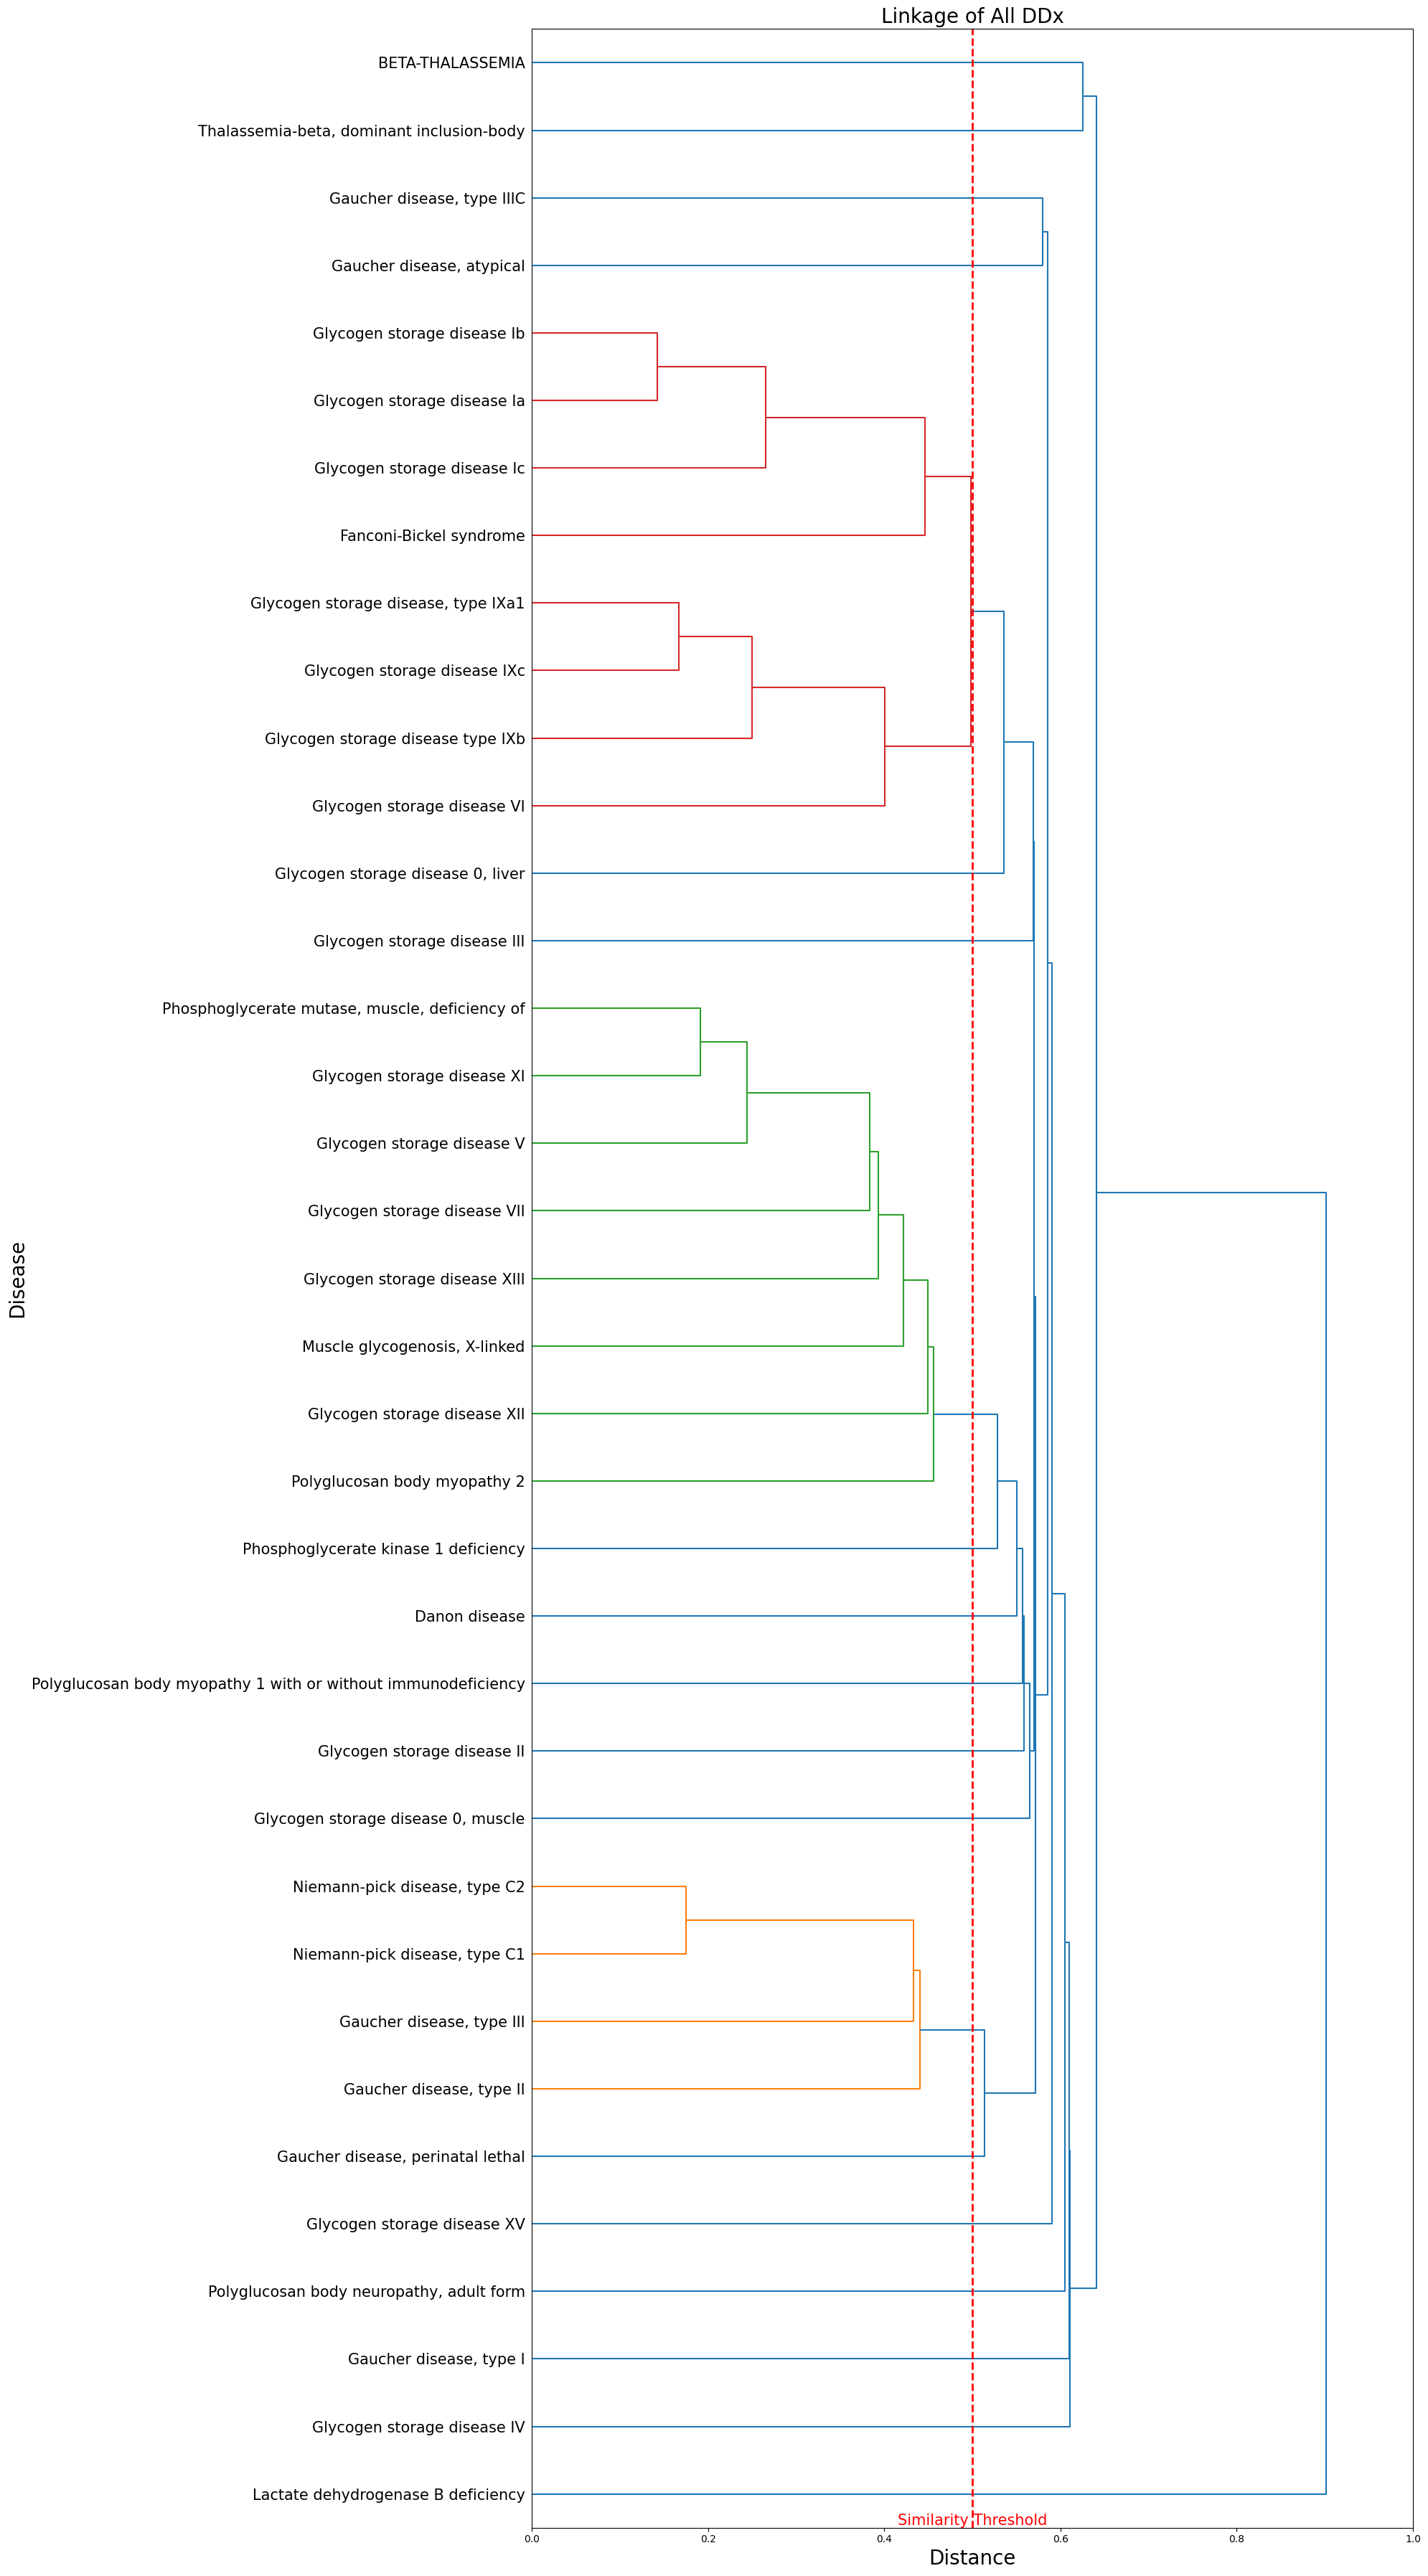

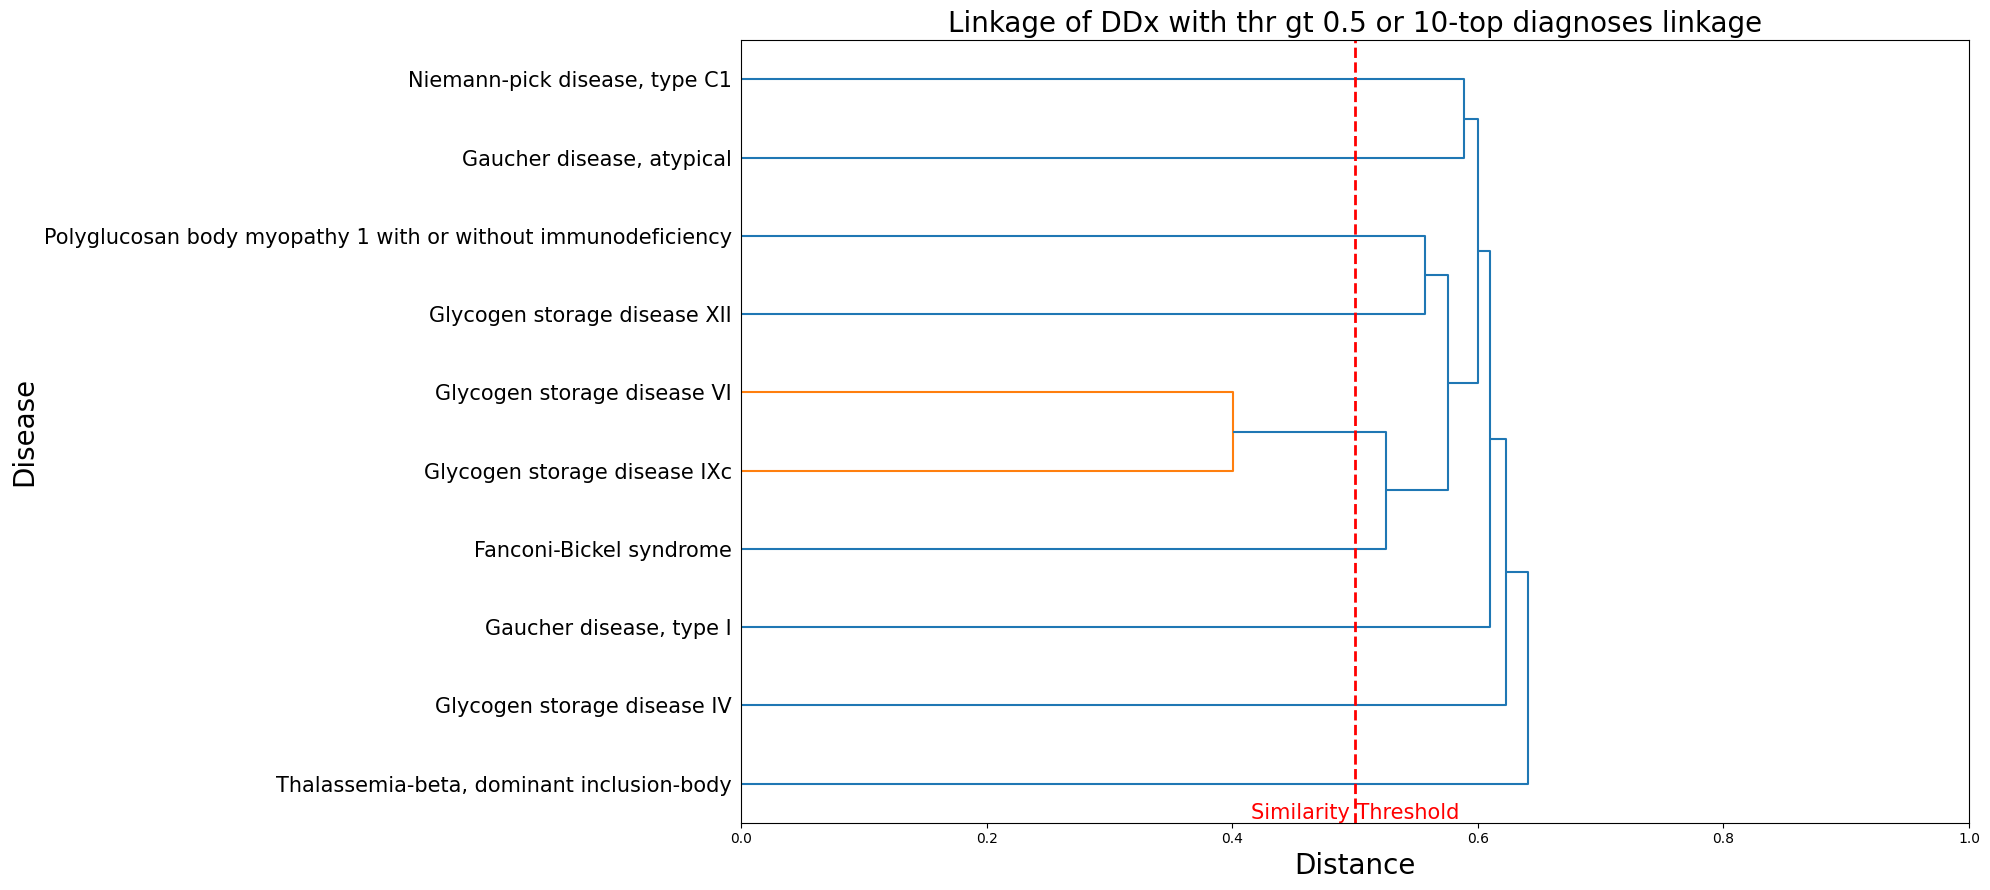

In [13]:
from iderare_pheno.utils import linkage_dendrogram

## Generate dendrogram for all differential diagnoses passing threshold
lnk_all_dendro = linkage_dendrogram(lnk_all, sr_dis_name, title='Linkage of All DDx', threshold=thr, path_to_save='output/linkage_all_ddx.png')


## Generate dendrogram for filtered differential diagnoses passing threshold
lnk_thr_dendro = linkage_dendrogram(lnk_thr, sr_dis_name_thr, title='Linkage of DDx with thr gt ' + str(thr) + ' or ' + str(diffx) + '-top diagnoses linkage', threshold=thr, path_to_save='output/linkage_filt_ddx.png')

Folder output already exists.
Folder output already exists.


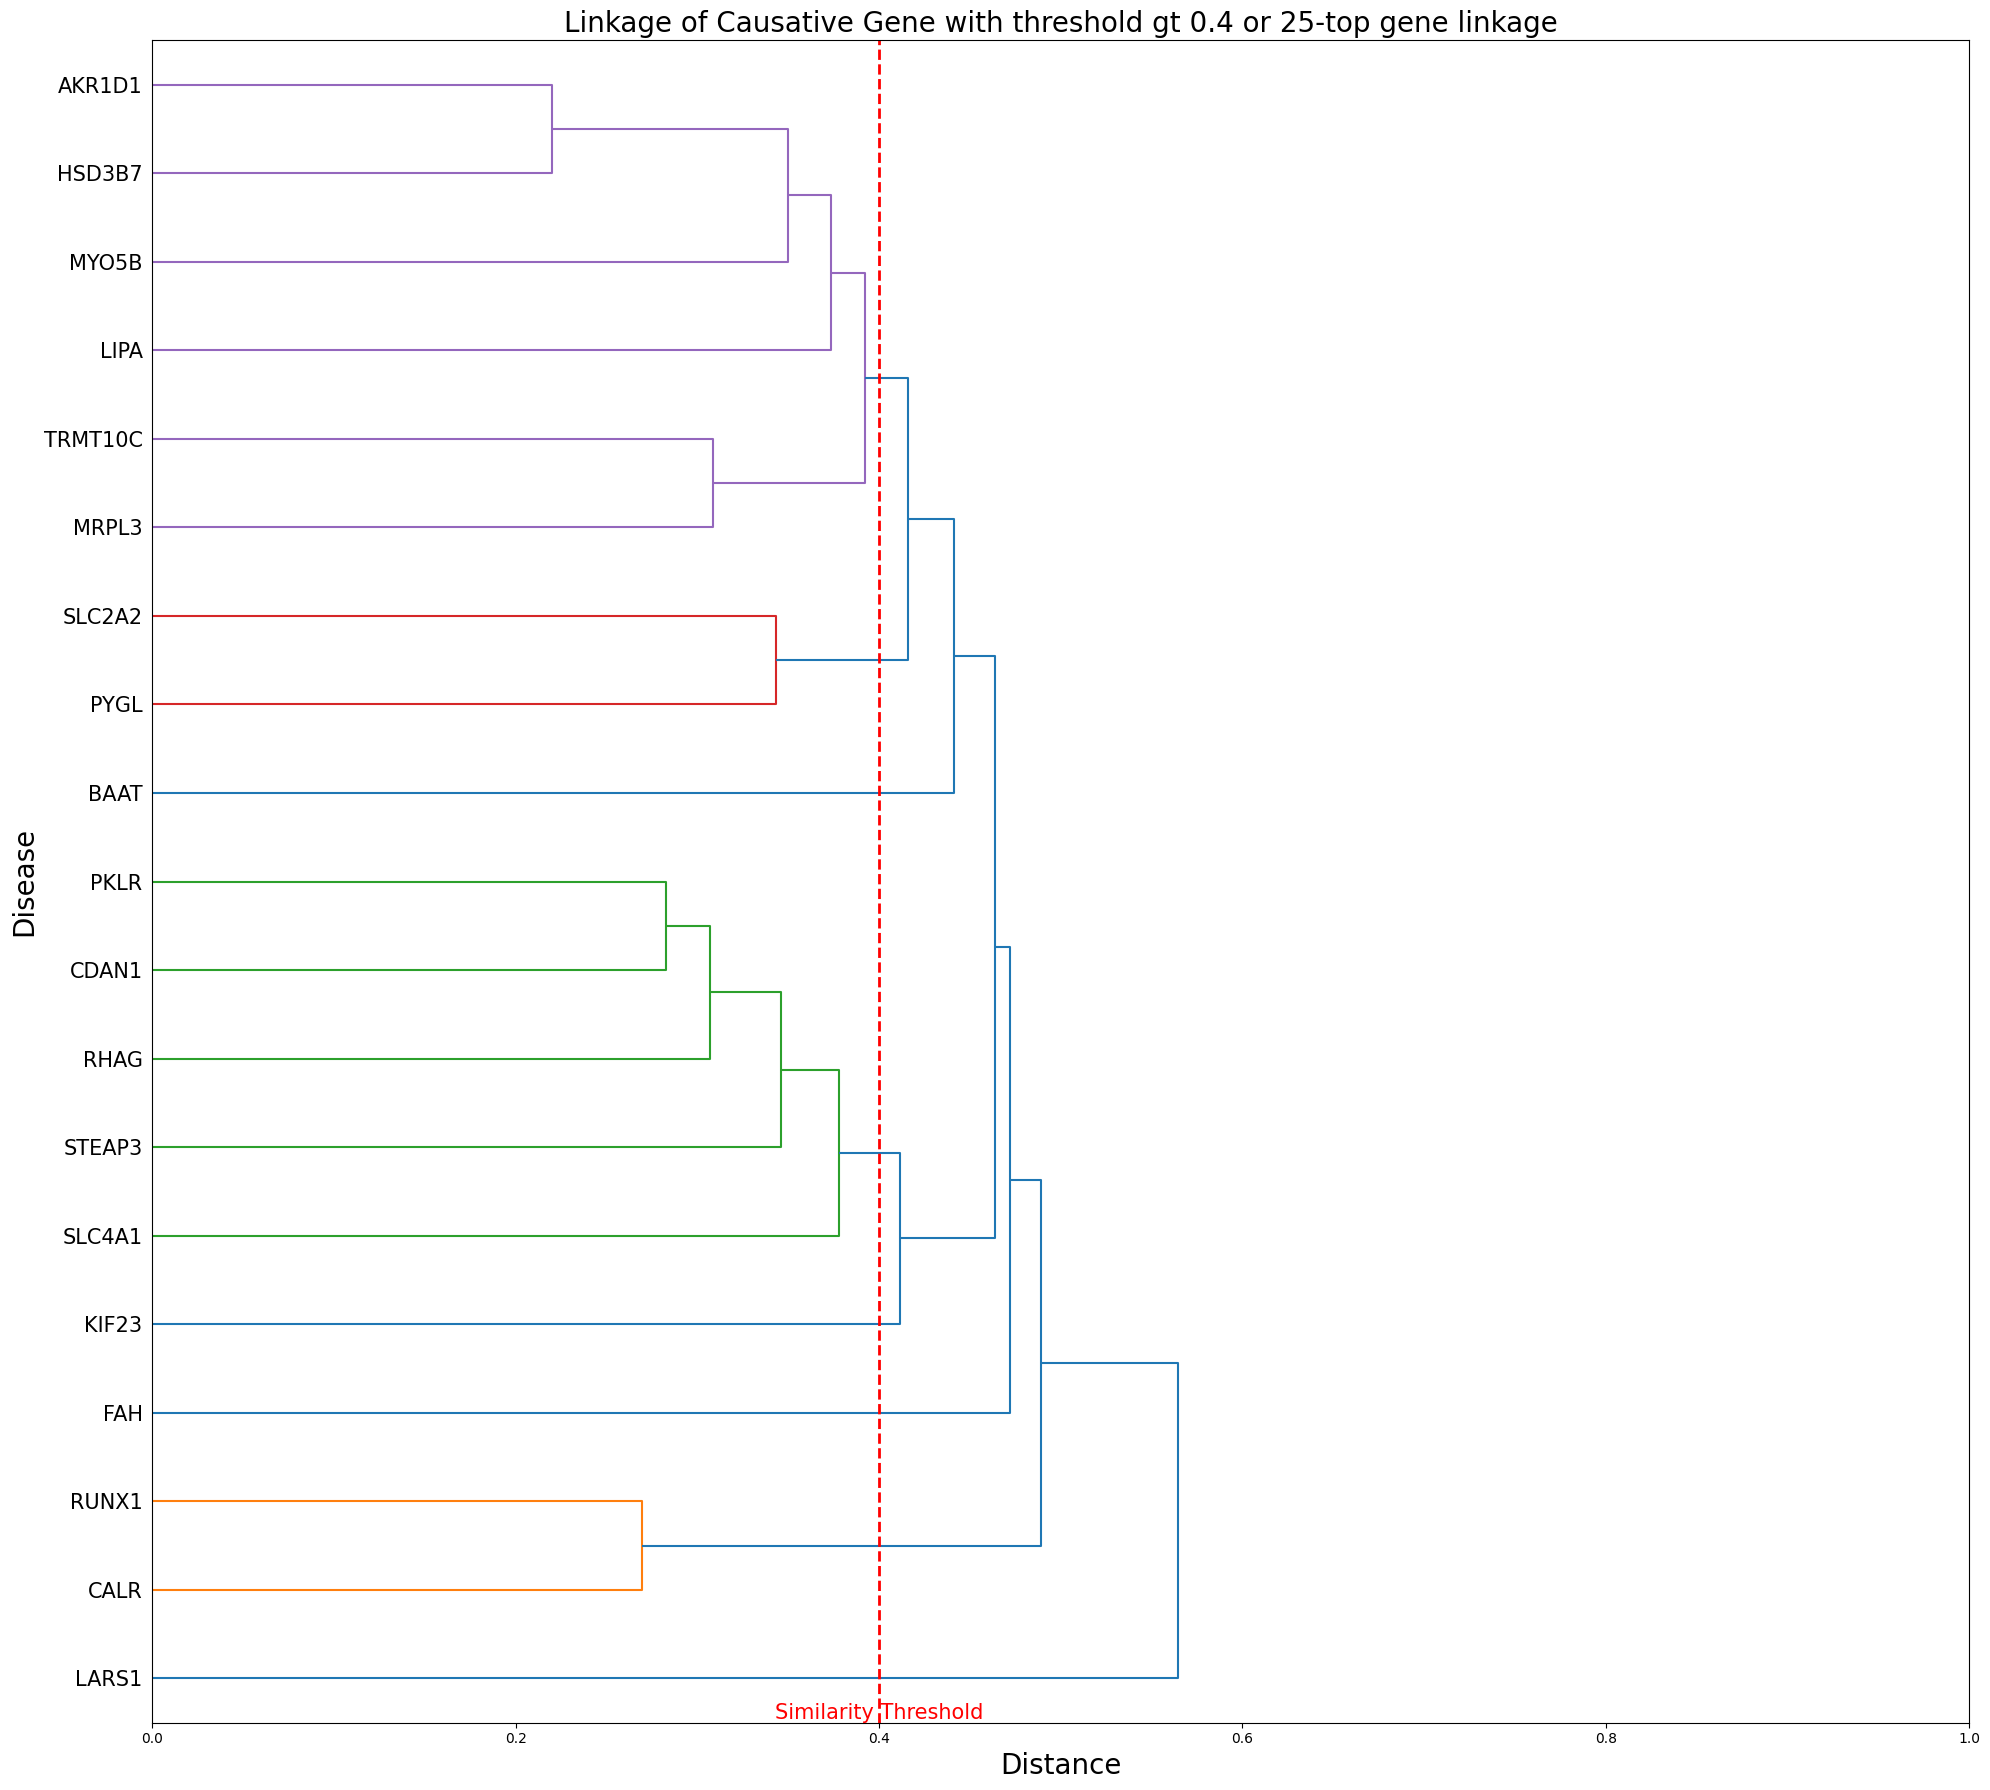

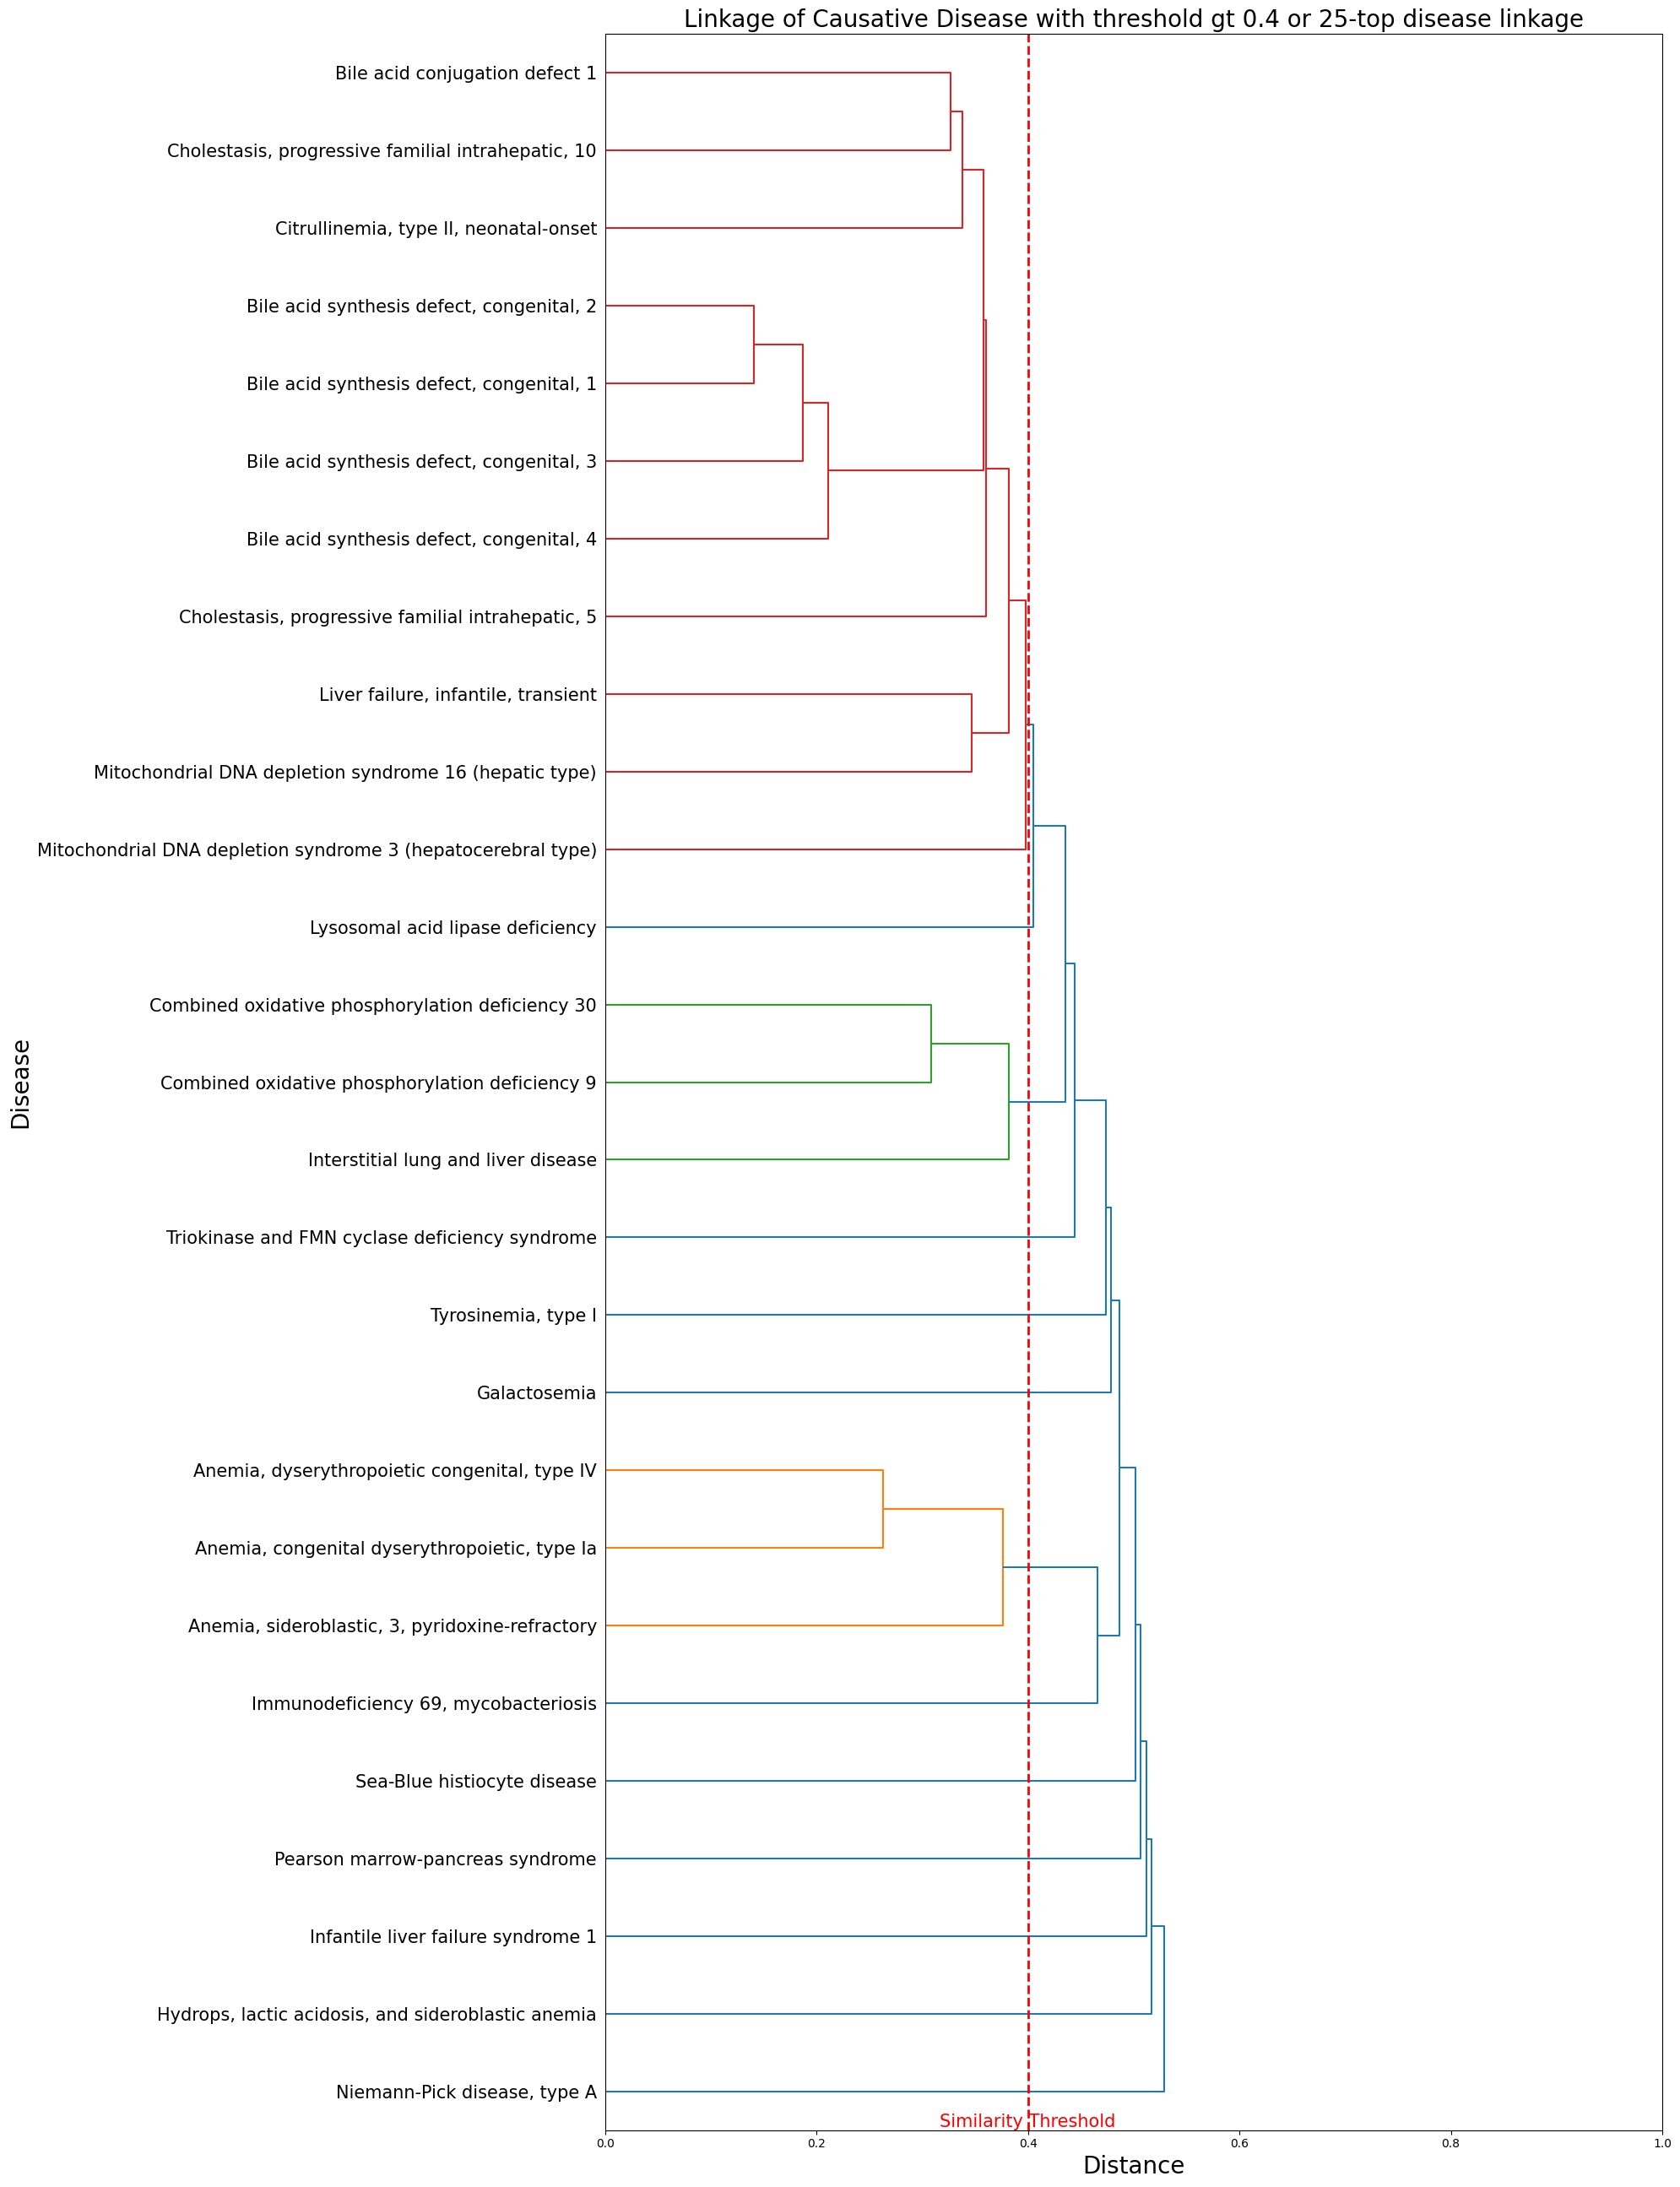

In [14]:
# Dendrogram for recommendation of high potential gene
lnk_thr_rg_dendo = linkage_dendrogram(rg_lnk_thr, rg_sr_dis_name_thr, title='Linkage of Causative Gene with threshold gt ' + str(rec_thr) + ' or ' + str(recx) + '-top gene linkage', threshold=rec_thr, path_to_save='output/linkage_gene.png')

# Dendrogram for recommendation of high potential disease
lnk_thr_rd_dendo = linkage_dendrogram(rd_lnk_thr, rd_sr_dis_name_thr, title='Linkage of Causative Disease with threshold gt ' + str(rec_thr) + ' or ' + str(recx) + '-top disease linkage', threshold=rec_thr, path_to_save='output/linkage_disease.png')

##### Saving the result as tsv :
```list2tsv``` function will get tthe **term_id**, **name**, and **similarity_score** to pass the similarity scoring data as tsv file. The tsv file will be saved in the ```output``` folder.

In [15]:
from iderare_pheno.utils import list2tsv
from iderare_pheno.simrec import hpo2name, omim2name

In [16]:
hpo_name = hpo2name(hpo_sets)
omim_name = omim2name(diagnosis_sets)

In [17]:
print('Save the HPO sets as tsv file.')
list2tsv(hpo_sets, hpo_name, filename='output/transformed_hpo_set')

print('Save the OMIM Diagnosis sets as tsv file.')
list2tsv(diagnosis_sets, omim_name, filename='output/transformed_omim_set')

print('Saving differential diagnosis sets similarity result into tsv file.')
list2tsv(sr_dis_id, sr_dis_name, s_sim, filename='output/differential_diagnosis_similarity')

print('There are total of {} recommended genes and {} recommended diagnoses.'.format(len(rg_sr_dis_name_thr), len(rd_sr_dis_name_thr)))
print('Saving gene and disease recommendation similarity result into tsv file.')
list2tsv(rg_sr_dis_id, rg_sr_dis_name, rg_s_sim, filename='output/recommended_gene_similarity')
list2tsv(rd_sr_dis_id, rd_sr_dis_name, rd_s_sim, filename='output/recommended_disease_similarity')


Save the HPO sets as tsv file.
Save the OMIM Diagnosis sets as tsv file.
Saving differential diagnosis sets similarity result into tsv file.
There are total of 19 recommended genes and 27 recommended diagnoses.
Saving gene and disease recommendation similarity result into tsv file.


,rank,id,name,score
0,1,278000,Lysosomal acid lipase deficiency,0.559613
1,2,615486,Interstitial lung and liver disease,0.489047
2,3,617021,"Hydrops, lactic acidosis, and sideroblastic an...",0.483670
3,4,613812,"Bile acid synthesis defect, congenital, 3",0.470100
4,5,618528,Mitochondrial DNA depletion syndrome 16 (hepat...,0.464310
...,...,...,...,...
8199,8200,613757,"Macular degeneration, age-related, 6",0.000030
8200,8201,613399,Familial breast-ovarian cancer-1,0.000027
8201,8202,243185,Natal teeth - intestinal pseudoobstruction - p...,0.000027
8202,8203,619805,Spermatogenic failure 68,0.000027


##### Saving the iderare.yml file as template for genotype analysis :
```generate_yml``` function will get tthe **phenotype hpo sets** and convert it to yml file as template for genotype analysis. The yml file will be saved in the ```output``` folder.

In [18]:
from iderare_pheno.utils import generate_yml

generate_yml(hpo_sets, filename='output/iderare.yml')

File output/iderare.yml has been created.
